In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from alpha_vantage.timeseries import TimeSeries

In [2]:
API_key='EG7F71P0XMBDB6YM'


ts=TimeSeries(key=API_key,output_format='pandas')
data=ts.get_daily_adjusted('BRITANNIA.BSE',outputsize='full')
df=data[0]
df=df.reset_index()
df.tail()

,date,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
4527,2005-01-07,834.1420,834.1420,807.5272,812.3168,61.3251,6260.0,0.0,1.0
4528,2005-01-06,813.3562,834.9102,780.9124,819.9534,61.9016,182350.0,0.0,1.0
4529,2005-01-05,849.5054,853.5722,817.8748,826.6862,62.4099,2090100.0,0.0,1.0
4530,2005-01-04,840.4680,849.5054,836.0398,845.3030,63.8154,88030.0,0.0,1.0
4531,2005-01-03,840.4680,849.5054,813.3562,842.3208,63.5902,16330.0,0.0,1.0


In [23]:
df.head()

,open,high,low,close,volume
0,4596.9502,4623.0000,4565.0000,4573.1499,5657.0
1,4595.0000,4622.0000,4553.1499,4596.8999,9861.0
2,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
3,4525.0000,4568.7002,4507.2500,4518.0498,3668.0
4,4497.6001,4580.0000,4493.1499,4520.1499,4714.0


In [3]:
df=df.drop(['date'],axis=1)
df=df.drop(['5. adjusted close'],axis=1)
df=df.drop(['7. dividend amount'],axis=1)
df=df.drop(['8. split coefficient'],axis=1)
df.head()

,1. open,2. high,3. low,4. close,6. volume
0,4596.9502,4623.0000,4565.0000,4573.1499,5657.0
1,4595.0000,4622.0000,4553.1499,4596.8999,9861.0
2,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
3,4525.0000,4568.7002,4507.2500,4518.0498,3668.0
4,4497.6001,4580.0000,4493.1499,4520.1499,4714.0


In [4]:
df.set_axis(['open', 'high', 'low','close','volume'], axis='columns', inplace=True)
df.head()

C:\Users\sriva\AppData\Local\Temp\ipykernel_4636\4210984839.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['open', 'high', 'low','close','volume'], axis='columns', inplace=True)


,open,high,low,close,volume
0,4596.9502,4623.0000,4565.0000,4573.1499,5657.0
1,4595.0000,4622.0000,4553.1499,4596.8999,9861.0
2,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
3,4525.0000,4568.7002,4507.2500,4518.0498,3668.0
4,4497.6001,4580.0000,4493.1499,4520.1499,4714.0


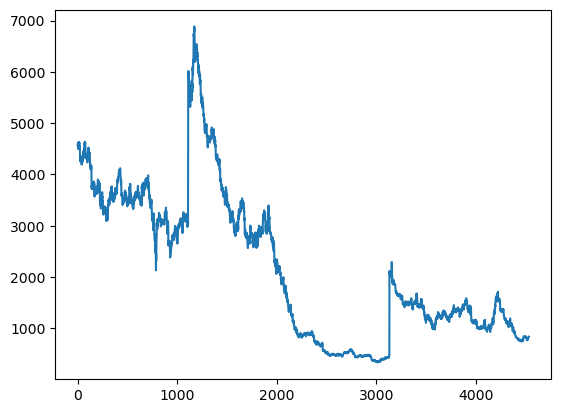

In [5]:
plt.plot(df.close)

In [39]:
df = df.reindex(index=df.index[::-1])
df.reset_index(inplace=True, drop=True)
df


,open,high,low,close,volume
0,840.4680,849.5054,813.3562,842.3208,16330.0
1,840.4680,849.5054,836.0398,845.3030,88030.0
2,849.5054,853.5722,817.8748,826.6862,2090100.0
3,813.3562,834.9102,780.9124,819.9534,182350.0
4,834.1420,834.1420,807.5272,812.3168,6260.0
...,...,...,...,...,...
4527,4497.6001,4580.0000,4493.1499,4520.1499,4714.0
4528,4525.0000,4568.7002,4507.2500,4518.0498,3668.0
4529,4555.0498,4706.0498,4533.8999,4564.5498,19986.0
4530,4595.0000,4622.0000,4553.1499,4596.8999,9861.0


In [40]:
ma100=df.close.rolling(100).mean()

In [41]:
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4527    4406.872490
4528    4408.297988
4529    4410.224986
4530    4412.338985
4531    4414.535984
Name: close, Length: 4532, dtype: float64

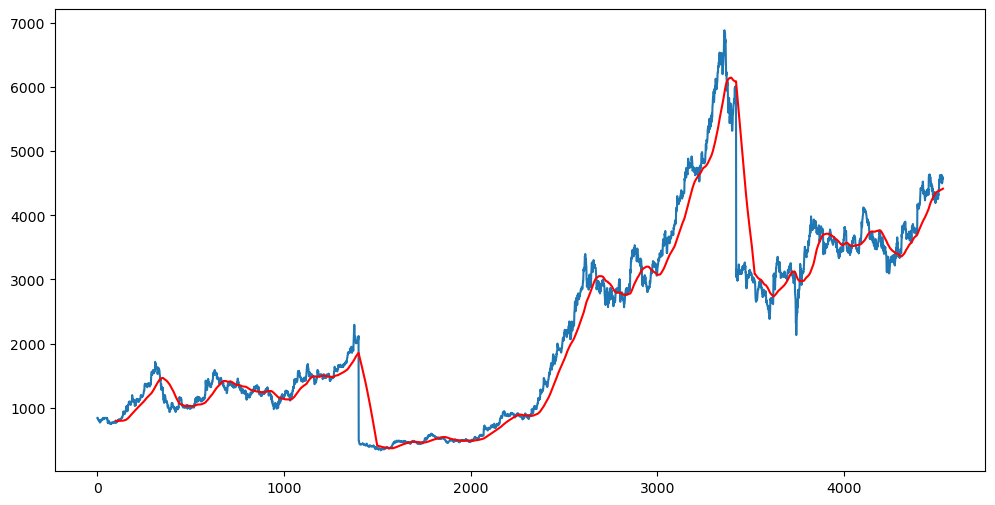

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')

In [43]:
ma200=df.close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
4527    4166.951245
4528    4170.176744
4529    4173.495243
4530    4177.187493
4531    4181.106492
Name: close, Length: 4532, dtype: float64

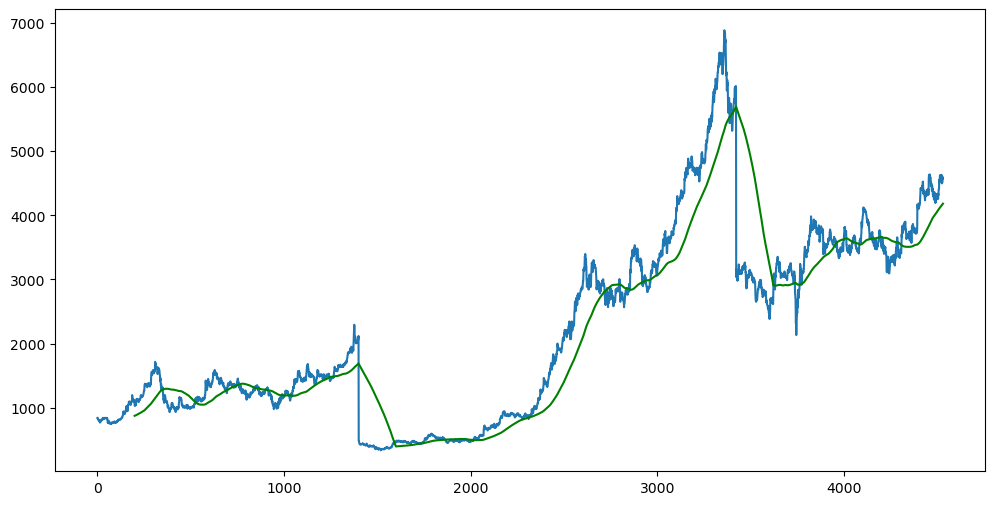

In [44]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
#plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [45]:
df.shape

(4532, 5)

In [46]:
#splitting data into training and testing
train=pd.DataFrame(df['close'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])
print(train.shape)
print(test.shape)

(3172, 1)
(1360, 1)


In [47]:
train

,close
0,842.3208
1,845.3030
2,826.6862
3,819.9534
4,812.3168
...,...
3167,4785.6000
3168,4740.8000
3169,4734.2500
3170,4735.9500


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [49]:
train_array=scaler.fit_transform(train)
train_array

array([[0.11106924],
       [0.11172531],
       [0.1076297 ],
       ...,
       [0.96727569],
       [0.96764968],
       [0.97247858]])

In [50]:
x_train=[]
y_train=[]

for i in range(100,train_array.shape[0]):
  x_train.append(train_array[i-100:i])
  y_train.append(train_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)


In [51]:
x_train.shape

(3072, 100, 1)

In [52]:
from  keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [53]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units=80,activation='relu',return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [55]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
96/96 [==============================] - 17s 144ms/step - loss: 0.0164
Epoch 2/25
96/96 [==============================] - 18s 192ms/step - loss: 0.0041
Epoch 3/25
96/96 [==============================] - 18s 188ms/step - loss: 0.0033
Epoch 4/25
96/96 [==============================] - 18s 187ms/step - loss: 0.0036
Epoch 5/25
96/96 [==============================] - 18s 185ms/step - loss: 0.0032
Epoch 6/25
96/96 [==============================] - 18s 190ms/step - loss: 0.0028
Epoch 7/25
96/96 [==============================] - 29s 302ms/step - loss: 0.0030
Epoch 8/25
96/96 [==============================] - 28s 290ms/step - loss: 0.0026
Epoch 9/25
96/96 [==============================] - 26s 271ms/step - loss: 0.0026
Epoch 10/25
96/96 [==============================] - 23s 242ms/step - loss: 0.0029
Epoch 11/25
96/96 [==============================] - 28s 295ms/step - loss: 0.0026
Epoch 12/25
96/96 [==============================] - 25s 263ms/step - loss: 0.0024
Epoch 13/25
9

In [39]:
tk=df.close[-100:]

In [40]:
tk

4431    777.1618
4432    771.7846
4433    769.7964
4434    763.6510
4435    767.7630
          ...   
4526    812.3168
4527    819.9534
4528    826.6862
4529    845.3030
4530    842.3208
Name: close, Length: 100, dtype: float64

In [56]:
import joblib

In [57]:
joblib.dump(model, 'model.pkl')
print("Model dumped!")

Model dumped!


In [58]:
model = joblib.load('model.pkl')

AttributeError: 'Series' object has no attribute 'columns'

In [22]:
#model.save('keras_model10.h5')

In [59]:
past_100_days=train.head(100)
final_df=past_100_days.append(test,ignore_index=True)

C:\Users\sriva\AppData\Local\Temp\ipykernel_4636\3420198636.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(test,ignore_index=True)


In [60]:
final_df.head()

,close
0,842.3208
1,845.3030
2,826.6862
3,819.9534
4,812.3168


In [61]:
input_data=final_df.to_numpy()
input_data

array([[ 842.3208],
       [ 845.303 ],
       [ 826.6862],
       ...,
       [4564.5498],
       [4596.8999],
       [4573.1499]])

In [62]:
input_data.shape

(1460, 1)

In [63]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])
  

In [28]:
# x_test=[]
# y_test=[]
# for i in range(100,final_df.shape[0]):
#   x_test.append(final_df[i-100:i])
#   y_test.append(final_df[i,0])

KeyError: (100, 0)

In [64]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1360, 100, 1)
(1360,)


In [65]:
#Makin Prediction

y_predict=model.predict(x_test)

43/43 [==============================] - 2s 47ms/step


In [66]:
y_predict.shape

(1360, 1)

In [67]:
y_predict[1349][0]

-87788020.0

In [31]:
y_test

array([0.76938164, 0.77651144, 0.77288028, ..., 0.22228853, 0.23215723,
       0.23057637])

In [32]:
y_predict

array([[0.68985367],
       [0.6854409 ],
       [0.6817955 ],
       ...,
       [0.16001207],
       [0.15968439],
       [0.159492  ]], dtype=float32)

In [33]:
scaler.scale_

array([0.0005301])

In [34]:
scale_factor=1/0.00762951
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

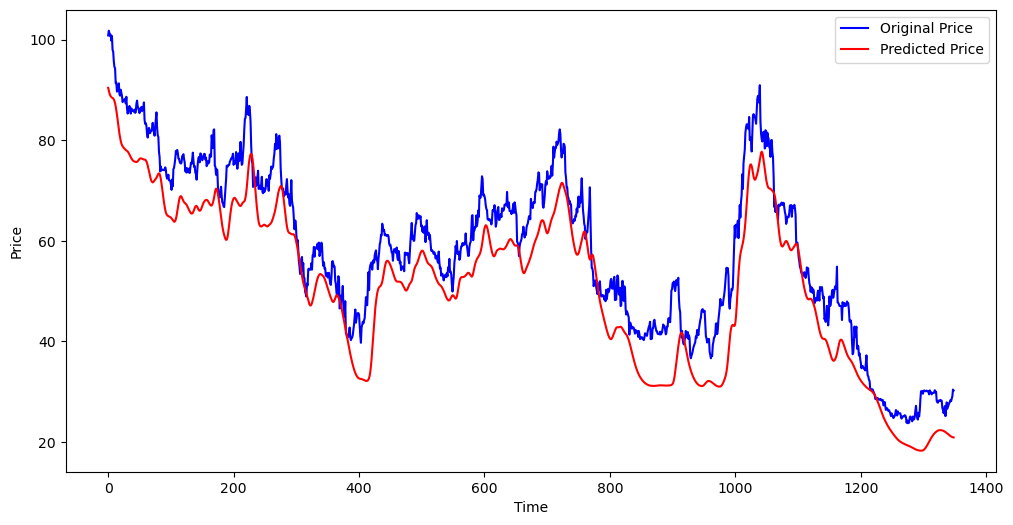

In [35]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [36]:
point=0
temp1=0
temp2=0
for i in range(1,y_test.shape[0]):
  temp1=y_predict[i]-y_test[i-1]
  temp2=y_test[i]-y_test[i-1]
  if temp1>=0 and temp2>=0 or temp1<=0 and temp2<=0:
    point+=1
print(point,y_test.shape)

663 (1349,)
